### INTRODUCTION


#### IMPORTING PYTHON LIBRARIES

In [76]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

# 1. DATA GATHERING

In [2]:
# Gathering the Twitter Archive data using Pandas

twitter_archive = pd.read_csv('Project Files/twitter archive enhanced.csv')
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [3]:
# Using Requests to download the image prediction file
with requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv') as image_predictions:
    with open ('Project Files/image prediction.tsv', 'wb') as ImagePrediction:
        ImagePrediction.write(image_predictions.content)

In [7]:
# Assessing the image prediction file 
image_prediction = pd.read_csv('Project Files/image prediction.tsv', sep='\t')

image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [ ]:
# Using Tweepy 

consumer_key = 'Hidden Key'
consumer_secret = 'Hidden Key'
access_token = 'Hidden Key'
access_secret = 'Hidden Key'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [4]:
# Gathering the Tweet Json file

tweets = []

for line in open("Project Files/tweet_json.txt", 'r'):
    tweets.append(json.loads(line))
    
tweets_df = pd.DataFrame(tweets)

tweets_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

# 2. DATA ASSESSMENT


### 2.1 VISUAL ASSESSMENTS

In [86]:
# Reading the twitter archive file 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
# Reading the image prediction file
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [87]:
# Reading the tweets_df file
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### 2.2 PROGRAMMATIC ASSESSMENTS

In [20]:
# Finding Nulls in the dataset 
twitter_archive.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [21]:
image_prediction.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [22]:
tweets_df.isnull().any()

created_at                       False
id                               False
id_str                           False
full_text                        False
truncated                        False
display_text_range               False
entities                         False
extended_entities                 True
source                           False
in_reply_to_status_id             True
in_reply_to_status_id_str         True
in_reply_to_user_id               True
in_reply_to_user_id_str           True
in_reply_to_screen_name           True
user                             False
geo                               True
coordinates                       True
place                             True
contributors                      True
is_quote_status                  False
retweet_count                    False
favorite_count                   False
favorited                        False
retweeted                        False
possibly_sensitive                True
possibly_sensitive_appeal

In [26]:
# Finding Duplicates
twitter_archive.duplicated().any()

False

In [31]:
image_prediction.duplicated().any()

False

In [7]:
# Finding Unique Values
twitter_archive.nunique()

tweet_id                      2349
in_reply_to_status_id           55
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            121
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

### QUALITY ISSUES (8)

1. Remove all NaN Values from the twitter_archive and tweets_df dataset.

2. Rename the column titles: p1, p2 and p3 etc.

3. Remove all columns that will not be needed for this project.

4. Remove id_str from the tweets_df dataset.

5. Remove all "None" in the dog name column.

6. Remove all "an", "the", "quite" and "a" in the dog name column.

7. Re-classify the p1, p2 and p3 columns to avoid repetition.

8. Remove all non animal naming from the image prediction dataset.




### TIDINESS ISSUES (2)

1. Recreate a dataframe called "tweet prediction" to contain image prediction and tweet df information.

2. Recreate a dataframe called "dog rating" to contain new_twitter_archive and new_image_prediction information, remove 1st Prediction and Dog Breed plus populate a ratings column.



# 3. DATA CLEANING

In [5]:
# MAKING A COPY OF THE ORIGINAL DATA
tweets_df_copy = tweets_df.copy()

In [8]:
image_prediction_copy = image_prediction.copy()

In [9]:
twitter_archive_copy = twitter_archive.copy()



## QUALITY ISSUES

## Issue #1

### Define: Remove all NaN Values from the twitter_archive and tweets_df dataset.

### CODE

In [10]:
new_tweets_df = tweets_df.dropna(axis='columns')

In [11]:
new_twitter_archive = twitter_archive.dropna(axis='columns')

### TEST

In [9]:
new_tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en


In [11]:
new_twitter_archive.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,8.921770e+17,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,8.918150e+17,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,8.916900e+17,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,8.913280e+17,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


## ISSUE #2


### DEFINE: Rename the column titles: p1, p2 and p3 etc.

### CODE

In [12]:
new_image_prediction = image_prediction.rename(columns = {'p1':'1st Prediction', 'p2':'2nd Prediction', 'p3':'3rd Prediction', 'p1_dog':'Dog Breed', 'p1_conf':'Prediction Confidence'})

In [13]:
tweet_df = new_tweets_df.rename(columns={'id':'tweet_id'})

### TEST

In [14]:
new_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st Prediction', 'p1_conf',
       'Dog Breed', '2nd Prediction', 'p2_conf', 'p2_dog', '3rd Prediction',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [93]:
tweet_df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## ISSUE #3


### DEFINE: Remove all columns that will not be needed for this project.

### CODE

In [88]:
new_tweets_df.drop(columns=['created_at','display_text_range','full_text','truncated','entities','source','user', 'is_quote_status', 'favorited',
                          'retweeted', 'lang'], axis=1,inplace=True)

In [15]:
new_twitter_archive.drop(columns=['timestamp','source','doggo','floofer','puppo','text','pupper'], axis=1, inplace=True)

In [16]:
new_image_prediction.drop(columns=['jpg_url','img_num','p2_conf','p2_dog','p3_dog','p3_conf'], axis=1, inplace=True)

### TEST

In [37]:
new_tweets_df.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [38]:
new_twitter_archive.columns

Index(['tweet_id', 'rating_numerator', 'rating_denominator', 'name'], dtype='object')

In [39]:
new_image_prediction.columns

Index(['tweet_id', '1st Prediction', 'Prediction Confidence', 'Dog Breed'], dtype='object')

## ISSUE #4



### DEFINE: Remove id_str from the tweets_df dataset.

### CODE

In [91]:
new_tweets_df.drop(columns=['id_str'], axis=1,inplace=True)

### TEST

In [41]:
new_tweets_df.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

## ISSUE #5


### DEFINE: Remove all "None" in the dog name column.

### CODE

In [42]:
# Removing all "None"
Twitter_Archive = new_twitter_archive[new_twitter_archive['name']=='None'].index
new_twitter_archive.drop(Twitter_Archive, inplace=True)

C:\Users\Mary A. Awah\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### TEST

In [43]:
new_twitter_archive.head()

,tweet_id,rating_numerator,rating_denominator,name
0,8.924210e+17,13,10,Phineas
1,8.921770e+17,13,10,Tilly
2,8.918150e+17,12,10,Archie
3,8.916900e+17,13,10,Darla
4,8.913280e+17,12,10,Franklin


## ISSUE #6



### DEFINE: Remove all "an", "the", "quite" and "a" in the dog name column.

### CODE

In [44]:
# Removing all "a"
Twitter_Archives = new_twitter_archive[new_twitter_archive['name']=='a'].index
new_twitter_archive.drop(Twitter_Archives, inplace=True)

C:\Users\Mary A. Awah\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
# Removing all "an"
Twitters_Archive = new_twitter_archive[new_twitter_archive['name']=='an'].index
new_twitter_archive.drop(Twitters_Archive, inplace=True)

In [46]:
# Removing all "the"
Twitters_Archives = new_twitter_archive[new_twitter_archive['name']=='the'].index
new_twitter_archive.drop(Twitters_Archives, inplace=True)

In [47]:
# Removing all "quite"
Twitters_archives = new_twitter_archive[new_twitter_archive['name']=='quite'].index
new_twitter_archive.drop(Twitters_archives, inplace=True)

### TEST

In [48]:
new_twitter_archive

,tweet_id,rating_numerator,rating_denominator,name
0,8.924210e+17,13,10,Phineas
1,8.921770e+17,13,10,Tilly
2,8.918150e+17,12,10,Archie
3,8.916900e+17,13,10,Darla
4,8.913280e+17,12,10,Franklin
...,...,...,...,...
2315,6.666910e+17,8,10,Christoper
2317,6.666450e+17,9,10,Jimothy
2318,6.664550e+17,10,10,Kreggory
2319,6.664470e+17,9,10,Scout


## ISSUE #7


### DEFINE: Re-classify the p1, p2 and p3 columns to avoid repetition.

### CODE

In [92]:
new_image_prediction.drop(columns=['2nd Prediction', '3rd Prediction'], axis=1,inplace=True)

### TEST

In [50]:
new_image_prediction.columns

Index(['tweet_id', '1st Prediction', 'Prediction Confidence', 'Dog Breed'], dtype='object')

## ISSUE #8


### DEFINE: Remove all non animal naming from the image prediction dataset.

### CODE

In [51]:
ImagePredict = new_image_prediction[new_image_prediction['1st Prediction']=='orange'].index
new_image_prediction.drop(ImagePredict, inplace=True)

### TEST

In [52]:
new_image_prediction.head()

,tweet_id,1st Prediction,Prediction Confidence,Dog Breed
0,666020888022790149,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,redbone,0.506826,True
2,666033412701032449,German_shepherd,0.596461,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,miniature_pinscher,0.560311,True




## TIDINESS ISSUES

## ISSUE #1


### DEFINE: Recreate a dataframe called "tweet prediction" to contain image prediction and tweet df information

### CODE

In [53]:
# Merging the Image Prediction and tweet df 
tweet_prediction = pd.merge(new_image_prediction,tweet_df, on='tweet_id', how='inner')

In [ ]:
# Removing not needed columns
tweet_prediction.drop(columns=['created_at','id_str','full_text','truncated','display_text_range', 'entities'])

### TEST

In [54]:
tweet_prediction.head()

,tweet_id,1st Prediction,Prediction Confidence,Dog Breed,created_at,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,532,2535,False,False,en
1,666029285002620928,redbone,0.506826,True,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,132,False,False,en
2,666033412701032449,German_shepherd,0.596461,True,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,en
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,311,False,False,en
4,666049248165822465,miniature_pinscher,0.560311,True,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,en


## Issue #2


### Define: Recreate a dataframe called "dog rating" to contain new_twitter_archive and new_image_prediction information.

### CODE

In [28]:
dog_rating = pd.merge(new_twitter_archive, new_image_prediction, on='tweet_id', how='left')

In [29]:
# Renaming the Prediction Confidence column name
dog_ratings = dog_rating.rename(columns={'Prediction Confidence':'Ratings'})

In [30]:
# Populating the Ratings column
division = dog_ratings['rating_numerator']/dog_rating['rating_denominator']
Dog_Rating = dog_ratings.fillna(value={'Ratings': division})

In [31]:
# Dropping the 1st Prediction and Dog Breed
Dog_Ratings = Dog_Rating.drop(columns=['1st Prediction', 'Dog Breed'])

### TEST

In [35]:
Dog_Ratings

,tweet_id,rating_numerator,rating_denominator,name,Ratings
0,8.924210e+17,13,10,Phineas,1.3
1,8.921770e+17,13,10,Tilly,1.3
2,8.918150e+17,12,10,Archie,1.2
3,8.916900e+17,13,10,Darla,1.3
4,8.913280e+17,12,10,Franklin,1.2
...,...,...,...,...,...
1532,6.666910e+17,8,10,Christoper,0.8
1533,6.666450e+17,9,10,Jimothy,0.9
1534,6.664550e+17,10,10,Kreggory,1.0
1535,6.664470e+17,9,10,Scout,0.9


# 4. DATA STORING

### DEFINE: Storing the tweet_prediction to csv



### CODE

In [33]:
tweet_prediction.to_csv('Storing Data/twitter_archive_master1.csv', index=False)

### TEST

In [58]:
Tweet_Prediction = pd.read_csv('Storing Data/twitter_archive_master1.csv')

Tweet_Prediction.tail()

,tweet_id,1st Prediction,Prediction Confidence,Dog Breed,created_at,id_str,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
2067,891087950875897856,Chesapeake_Bay_retriever,0.425595,True,Sat Jul 29 00:08:17 +0000 2017,891087950875897856,Here we have a majestic great white breaching ...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,3261,20562,False,False,en
2068,891327558926688256,basset,0.555712,True,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,en
2069,891689557279858688,paper_towel,0.170278,False,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,en
2070,891815181378084864,Chihuahua,0.716012,True,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,en
2071,892177421306343426,Chihuahua,0.323581,True,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,en


### DEFINE: Storing the Dog_Ratings to csv


### CODE

In [55]:
Dog_Ratings.to_csv('Storing Data/twitter_archive_master2.csv', index=False)

### TEST

In [56]:
DogRating = pd.read_csv('Storing Data/twitter_archive_master2.csv')
DogRating.head()

,tweet_id,rating_numerator,rating_denominator,name,Ratings
0,8.924210e+17,13,10,Phineas,1.3
1,8.921770e+17,13,10,Tilly,1.3
2,8.918150e+17,12,10,Archie,1.2
3,8.916900e+17,13,10,Darla,1.3
4,8.913280e+17,12,10,Franklin,1.2


# 5. ANALYZING AND VISUALIZING DATA

### INSIGHT 1

In [72]:
# Finiding which dog had the highest retweet count
highest_retweet_count=Tweet_Prediction[['1st Prediction', 'retweet_count','Dog Breed']][(Tweet_Prediction['Dog Breed']==True) 
                                                                                        & (Tweet_Prediction['retweet_count']
                                                                                           .max())]  

In [73]:
highest_retweet_count[['1st Prediction','retweet_count','Dog Breed']].max()

1st Prediction    wire-haired_fox_terrier
retweet_count                       79515
Dog Breed                            True
dtype: object

### INSIGHT 2

In [66]:
# Finding which dog had the highest rating
DogRating[['name','Ratings']].max()

name        very
Ratings    177.6
dtype: object

### INSIGHT 3

In [70]:
# Finding which dog had the highest favorite count
Tweet_Prediction[['1st Prediction', 'favorite_count','Dog Breed']].max()

1st Prediction     zebra
favorite_count    132810
Dog Breed           True
dtype: object

### VISUALIZATION

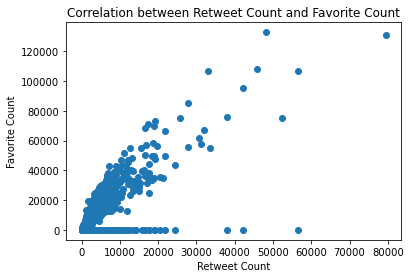

In [85]:
# Creating a Pie Plot for the ratings
plt.scatter(Tweet_Prediction['retweet_count'], Tweet_Prediction['favorite_count'])
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Correlation between Retweet Count and Favorite Count')
plt.show()